In [1]:
import requests
from bs4 import BeautifulSoup
def extract_text(url: str) -> str:
    response = requests.get(url)
    soup = BeautifulSoup(response.text, "html.parser")
    body = soup.find_all("div", class_="text-editor")
    text_elements = [element.get_text() for element in body]
    return text_elements[0]

In [3]:
pais = [
    'https://eldeber.com.bo/pais/fiscalia-apelara-la-sentencia-de-murillo-lopez-y-otros-involucrados-en-el-caso-gases-lacrimogenos_387290',
    'https://eldeber.com.bo/pais/en-medio-del-escandalo-de-evo-diputado-evista-presenta-a-una-joven-que-asegura-haber-tenido-un-roman_387277',
    'https://eldeber.com.bo/pais/defensa-de-anez-ya-acudio-a-la-cidh-y-ahora-exige-un-juicio-de-responsabilidades_387219',
    'https://eldeber.com.bo/pais/campesinos-de-adepcoca-expulsan-a-lizette-torrez-y-a-su-directorio-nombran-un-comite-ad-hoc_387202',
    'https://eldeber.com.bo/pais/presidente-arce-instruye-la-militarizacion-de-las-fronteras-de-bolivia_387145',
    'https://eldeber.com.bo/cochabamba/pelea-entre-reos-en-el-penal-de-el-abra-termina-con-un-muerto_387121',
    'https://eldeber.com.bo/pais/doria-medina-anuncia-que-presentara-un-plan-de-soluciones-a-la-crisis-integral-de-bolivia_387120',
    'https://eldeber.com.bo/pais/branko-marinkovic-creo-que-la-mayoria-de-las-estatales-se-deben-privatizar_387089',
    'https://eldeber.com.bo/pais/judiciales-hay-8-candidatos-con-el-cargo-asegurado-y-van-11-renuncias_387087',
    'https://eldeber.com.bo/pais/jeanine-anez-exige-su-inmediata-libertad-tras-la-confesion-de-evo-morales_387096',
]
deportes = [
    'https://eldeber.com.bo/futbol/la-verde-que-jugadores-de-la-presente-convocatoria-fueron-parte-del-ultimo-partido-ante-colombia-en-_387270',
    'https://eldeber.com.bo/tenis/murkel-dellien-eliminado-en-primera-ronda-del-challenger-de-villa-maria_387303',
    'https://eldeber.com.bo/futbol/el-gramado-de-villa-ingenio-esta-en-excelentes-condiciones_387250',
    'https://eldeber.com.bo/futbol/la-final-de-la-copa-sudamericana-2024-se-jugara-en-asuncion-paraguay_387294',
    'https://eldeber.com.bo/futbol/argentina-vencio-a-venezuela-y-hubo-empate-entre-brasil-y-uruguay-en-el-sub-15_387209',
    'https://eldeber.com.bo/futbol/vinicius-se-sumo-a-las-bajas-de-la-seleccion-brasilena_387183',
    'https://eldeber.com.bo/multideportivo/cordova-cre-petrolero-y-adutoys-clasificaron-a-cuartos-en-la-liga-nacional-de-futsal_387206',
    'https://eldeber.com.bo/futbol/volvio-el-respeto-a-la-altura-villa-ingenio-la-nueva-casa-de-la-seleccion-boliviana_387119',
    'https://eldeber.com.bo/futbol/la-influencia-de-miguel-terceros-en-la-seleccion_387102',
    'https://eldeber.com.bo/futbol/jugadores-colombianos-se-incorporan-a-la-concentracion-en-cochabamba-videos_387052',
]
economia = [
    'https://eldeber.com.bo/economia/notifican-a-comunarios-de-tariquia-por-impedir-ingreso-de-ypfb_387284',
    'https://eldeber.com.bo/dinero/la-venta-externa-de-manufactura-retorno-a-los-niveles-de-2021_387203',
    'https://eldeber.com.bo/dinero/monica-cabrera-debe-haber-incentivos-para-que-la-inversion-extranjera-se-sienta-segura_387179',
    'https://eldeber.com.bo/dinero/carniceros-suspenden-paro-y-fijan-precios-entre-bs-32-y-45-el-kilo-para-el-consumidor-final_387224',
    'https://eldeber.com.bo/economia/garantizan-produccion-y-abastecimiento-de-carne-de-pollo-y-cerdo-tras-reunion-del-gobierno-con-produ_387201',
    'https://eldeber.com.bo/economia/senales-de-recesion-creditos-de-vivienda-de-interes-social-aumentan-un-04-en-el-ultimo-ano_387154',
    'https://eldeber.com.bo/economia/carniceros-amplian-paro-de-72-horas-a-indefinido-por-el-alza-del-precio-del-kilo-gancho-de-la-carne-_387081',
    'https://eldeber.com.bo/economia/carniceros-van-a-paro-indefinido-y-suben-precios-de-varios-productos_387093',
    'https://eldeber.com.bo/economia/la-anh-incrementa-volumen-para-atender-demanda-de-combustible-y-reducir-colas-en-surtidores_387064',
    'https://eldeber.com.bo/economia/a-pesar-de-las-largas-colas-en-surtidores-la-anh-asegura-normalizacion-en-la-venta-de-combustible_387038',
]
print('Pais:', len(pais))
print('Deportes:', len(deportes))
print('Economia:', len(economia))

Pais: 10
Deportes: 10
Economia: 10


In [15]:
urls = pais + deportes + economia
texts = [extract_text(url) for url in urls]

In [16]:
for text in texts:
    print(len(text))

2305
3613
4907
2262
1859
2565
1192
7446
5976
2433
2068
1154
2222
3736
1954
1201
2218
2388
3684
3574
1328
3459
4947
2670
3783
2800
2283
3632
3353
4041


In [5]:
import spacy
import numpy as np

In [6]:
def extract_embedding(text: str, nlp: spacy.Language) -> np.ndarray:
    doc = nlp(text)
    return doc.vector

In [17]:
import spacy
nlp = spacy.load("es_core_news_md")

embeddings = np.array([extract_embedding(text, nlp) for text in texts])

In [18]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [34]:
color = ['r' for i in pais] + ['b' for i in deportes] + ['g' for i in economia]

In [23]:
pca2 = PCA(n_components=2)
embeddings_2d = pca2.fit_transform(embeddings)

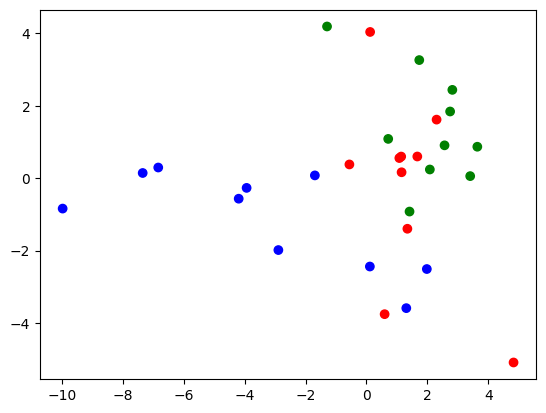

In [35]:
lines = plt.scatter(embeddings_2d[:,0], embeddings_2d[:,1],c=color)
plt.show()

In [36]:
embeddings.shape

(30, 300)

In [37]:
from sklearn.metrics.pairwise import cosine_similarity

def find_similarity(emb1: np.ndarray, emb2: np.ndarray) -> float:
    return cosine_similarity([emb1], [emb2])[0][0]

In [39]:
find_similarity(embeddings[3], embeddings[2])

np.float32(0.9536683)

In [49]:
def find_top_similar(emb: int, embeddings: np.ndarray, n: int) -> list:
    similarities = [find_similarity(emb, embeddings[i]) for i in range(embeddings.shape[0])]
    return np.argsort(similarities)[::-1][1:n+1]

In [50]:
find_top_similar(embeddings[0], embeddings, 5)

array([20,  8,  3,  2,  5])

In [51]:
def find_similar_news(text: str, embs: np.ndarray, n: int) -> list:
    emb = extract_embedding(text, nlp)
    indexes = find_top_similar(emb, embs, n)
    print(indexes)
    return [urls[i] for i in indexes]

In [53]:
test_news = '''
8 de octubre (Urgente.bo)- El presidente de la Cámara de Senadores, Andrónico Rodríguez, negó este martes que haya buscado impulsar un proyecto de ley que plantea eliminar el delito de estupro.

“Hay supuestas denuncias, declaraciones y afirmaciones que son falsas. Yo en ningún momento solicité o le pedí al presidente de la Cámara de Diputados, mediante una carta para tratar una ley y eliminar el delito de estupro, toralmente falso”, expuso Andrónico en conferencia de prensa.

Andrónico 8 de.jpg

En pasados días, circuló una nota firmada por Andrónico en el que presuntamente solicitaba a la Cámara de Diputados considerar el proyecto de ley 010, que plantea cambiar el tipo penal de estupro por violencia sexual.

Andrónico indicó que los medios de comunicación se apoyaron en la simple nota de remisión, así como de las más de las 300 leyes aprobadas y sancionadas.

“Es una simple nota de remisión, no es una carta de pedido o solicitud para tratar una ley y eliminar el delito de estupro, falso”, dijo el titular de Senadores.


Indicó que el proyecto de ley trata del mes de abril, cuando se lo puso a consideración y fue aprobado, por lo tanto, a través de una nota firmada por él, se lo remitió a Diputados. Dijo que la proyectista es la senadora de CC, Andra Barrientos. 

La presunta intención de Andrónico tomó fuerza en medio de denuncias de estupro contra el expresidente Evo Morales.
'''

find_similar_news(test_news, embeddings, 3)

[ 9  5 20]


['https://eldeber.com.bo/pais/jeanine-anez-exige-su-inmediata-libertad-tras-la-confesion-de-evo-morales_387096',
 'https://eldeber.com.bo/cochabamba/pelea-entre-reos-en-el-penal-de-el-abra-termina-con-un-muerto_387121',
 'https://eldeber.com.bo/economia/notifican-a-comunarios-de-tariquia-por-impedir-ingreso-de-ypfb_387284']